<a href="https://colab.research.google.com/github/siddhp4/Assignment-1-Q23-Basic-Statistics-Level-1-/blob/main/Assg_Amazon's_product_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install selenium

     |████████████████████████████████| 958 kB 24.9 MB/s 
     |████████████████████████████████| 356 kB 52.1 MB/s 
     |████████████████████████████████| 138 kB 58.7 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 3.6 MB 45.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [9]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [10]:
samsung_reviews=[]

## Extracting reviews from amazon for product Samsung Galaxy S20

In [11]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [13]:
 samsung_reviews

['\n\n  Best mobile with this price range. I loved the camera quality which have 100x zoom.\n\n',
 '\n\n  Great product. Smooth 120Hz display refresh rate. Perfect camera system, with fixed auto focus issue. Large size but good weight distribution. Recommend to buy a spigen case with it to protect this very expensive phone.Screen protector is pre applied.Battery life on exynos chip can be between 5-6 hours screen on time (BT, WiFi, on and connected).\n\n',
 '\n\n  Great Device ,JUST upgraded from Note 10 +Read my review , hope it will help you1. Display ( 5/5 ) - Samsung brand makes one of the greatest displays in the smartphone industry , This is absolutely best .. Quad Hd Amoled Dynamic Display is a treat .... The display size is around 7 which is great who likes big sized phones ( like me )...2 . Sound ( 4.5/5 ) - Better sound and louder than my previous note 10 + ....... You will enjoy the sound quality in games or while watching movies3 . Sensors ( 4.5/5 ) - Face unlock is super f

In [14]:
reviews = ' '.join(samsung_reviews)

## Data Cleaning

In [15]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## tokenize

In [25]:
reviews_token = word_tokenize(reviews)

In [26]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [27]:
reviews_without_sw

['best',
 'mobile',
 'price',
 'range',
 'loved',
 'camera',
 'quality',
 'x',
 'zoom',
 'great',
 'product',
 'smooth',
 'hz',
 'display',
 'refresh',
 'rate',
 'perfect',
 'camera',
 'system',
 'fixed',
 'auto',
 'focus',
 'issue',
 'large',
 'size',
 'good',
 'weight',
 'distribution',
 'recommend',
 'buy',
 'spigen',
 'case',
 'protect',
 'expensive',
 'phone',
 'screen',
 'protector',
 'pre',
 'applied',
 'battery',
 'life',
 'exynos',
 'chip',
 'hours',
 'screen',
 'time',
 'bt',
 'wifi',
 'connected',
 'great',
 'device',
 'upgraded',
 'note',
 'read',
 'review',
 'hope',
 'help',
 'display',
 'samsung',
 'brand',
 'makes',
 'greatest',
 'displays',
 'smartphone',
 'industry',
 'absolutely',
 'best',
 'quad',
 'hd',
 'amoled',
 'dynamic',
 'display',
 'treat',
 'display',
 'size',
 'around',
 'great',
 'likes',
 'big',
 'sized',
 'phones',
 'like',
 'sound',
 'better',
 'sound',
 'louder',
 'previous',
 'note',
 'enjoy',
 'sound',
 'quality',
 'games',
 'watching',
 'movies',
 '

In [28]:
reviews=' '.join(reviews_without_sw)

## Word cloud

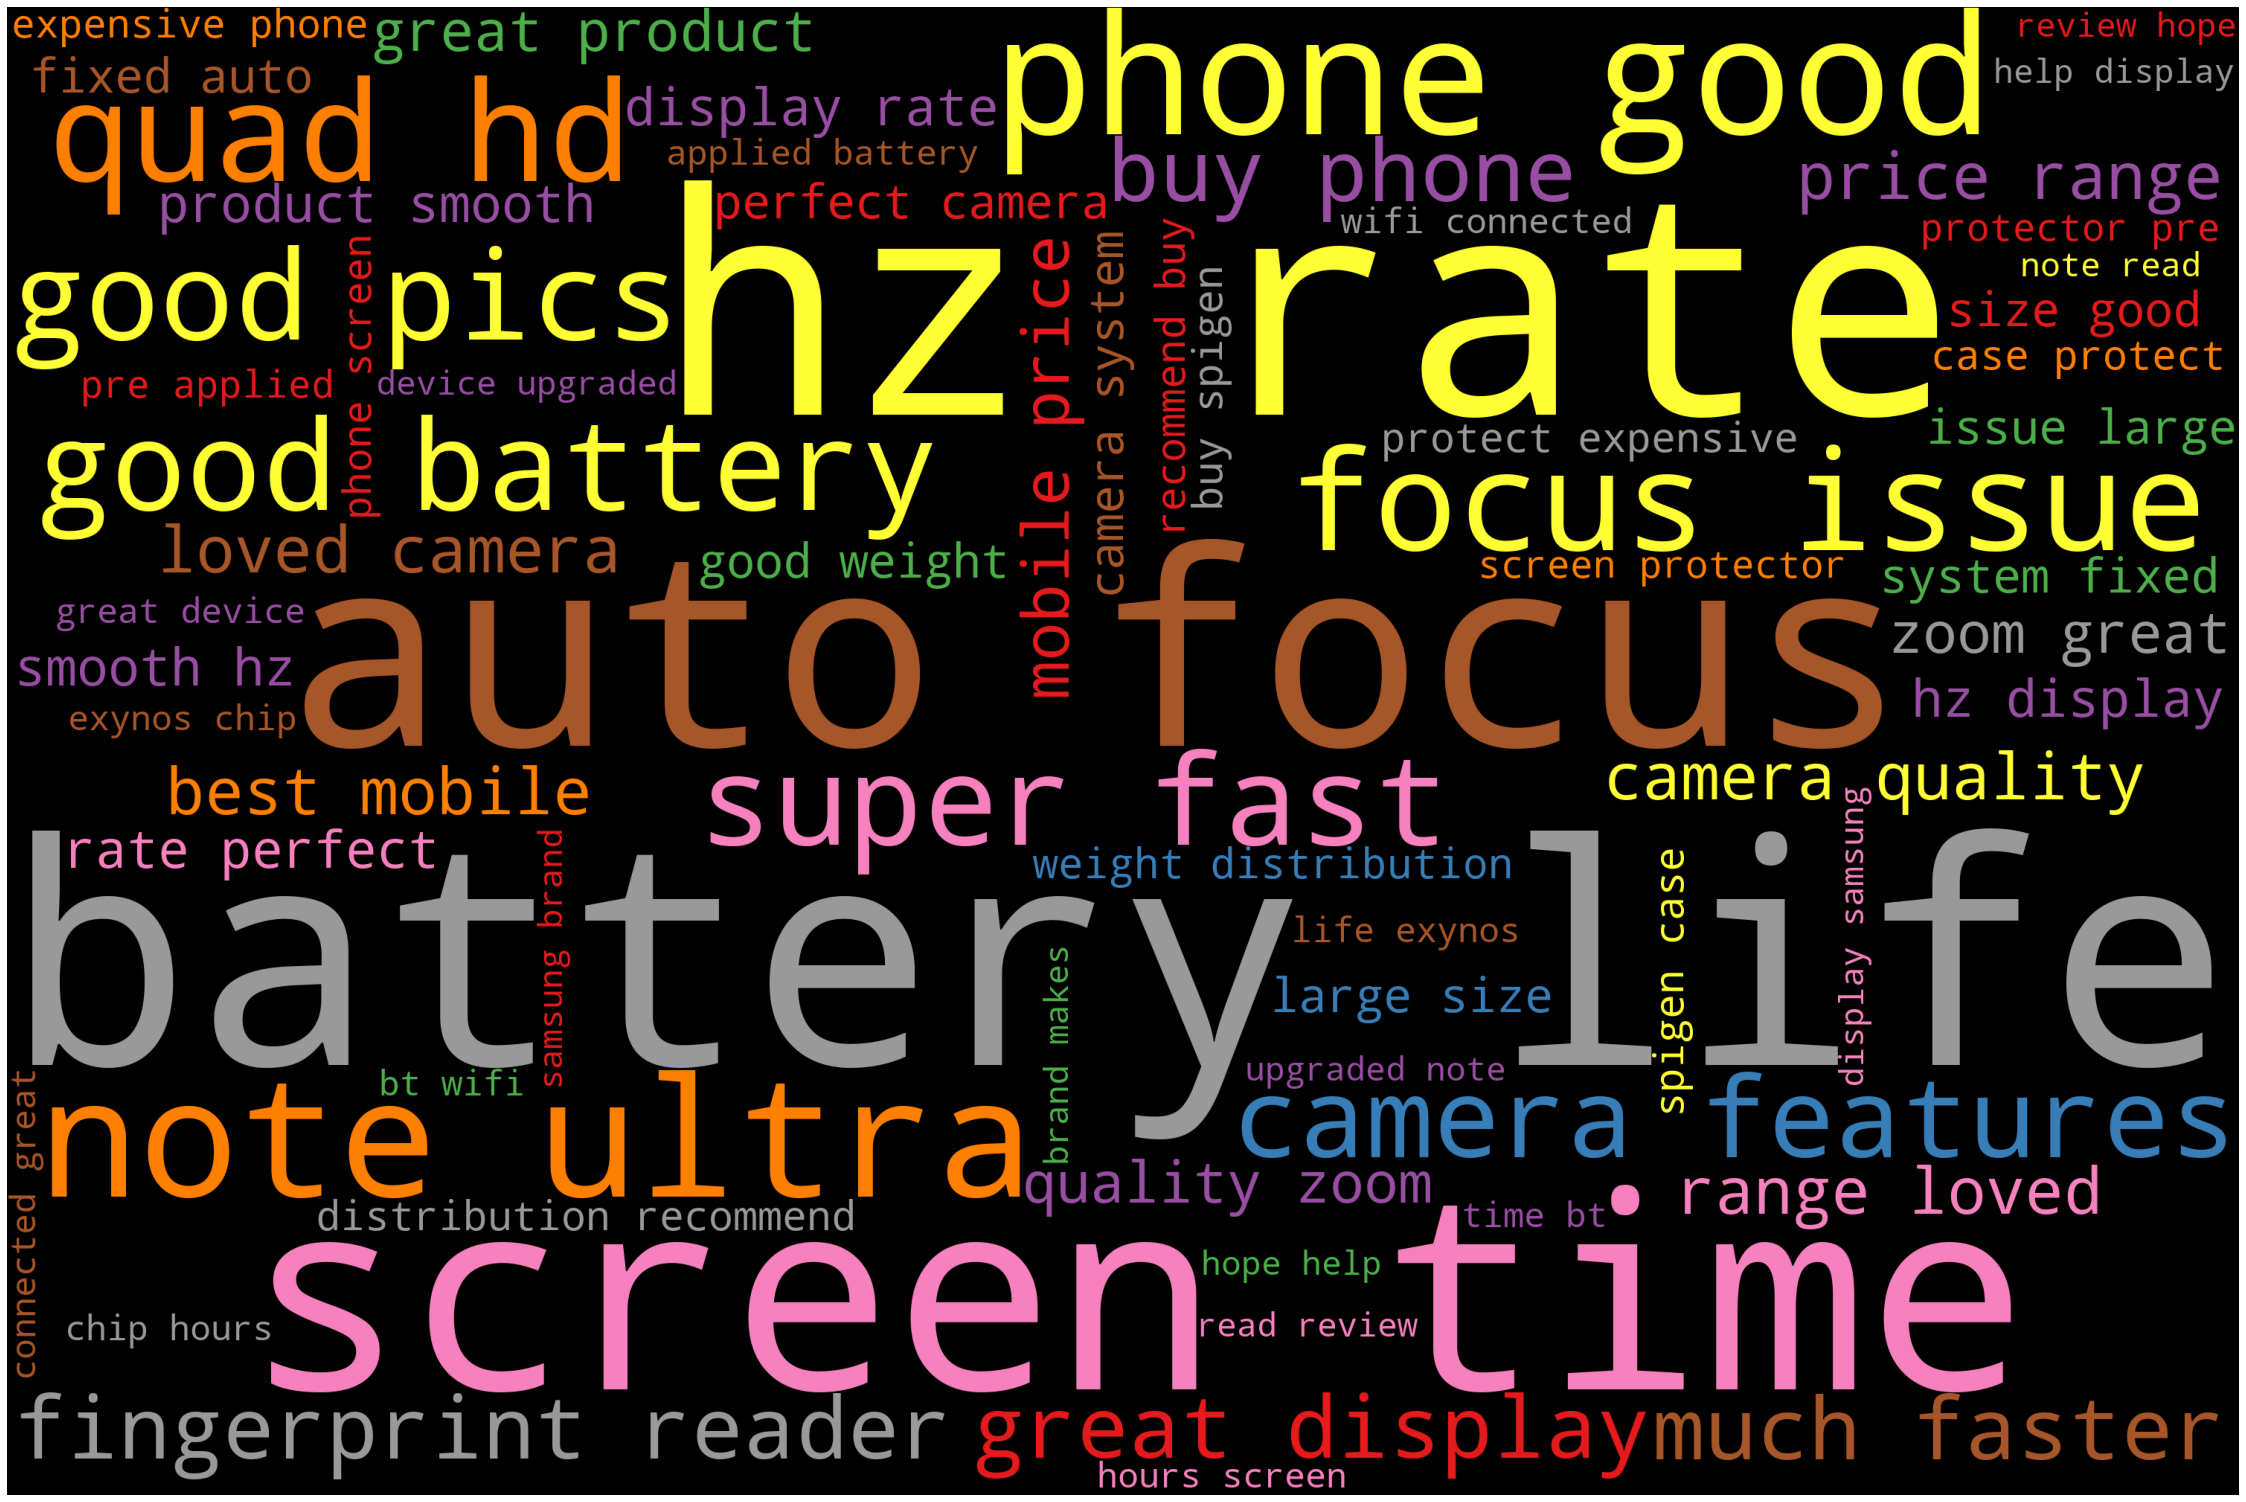

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

### Emotion Mining

In [42]:
with open("negative-words.txt","r", encoding="ISO-8859-1") as f:
  negative=f.read().split("\n")

In [43]:
negative = negative[35:]

In [44]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

### Word Cloud for negative word

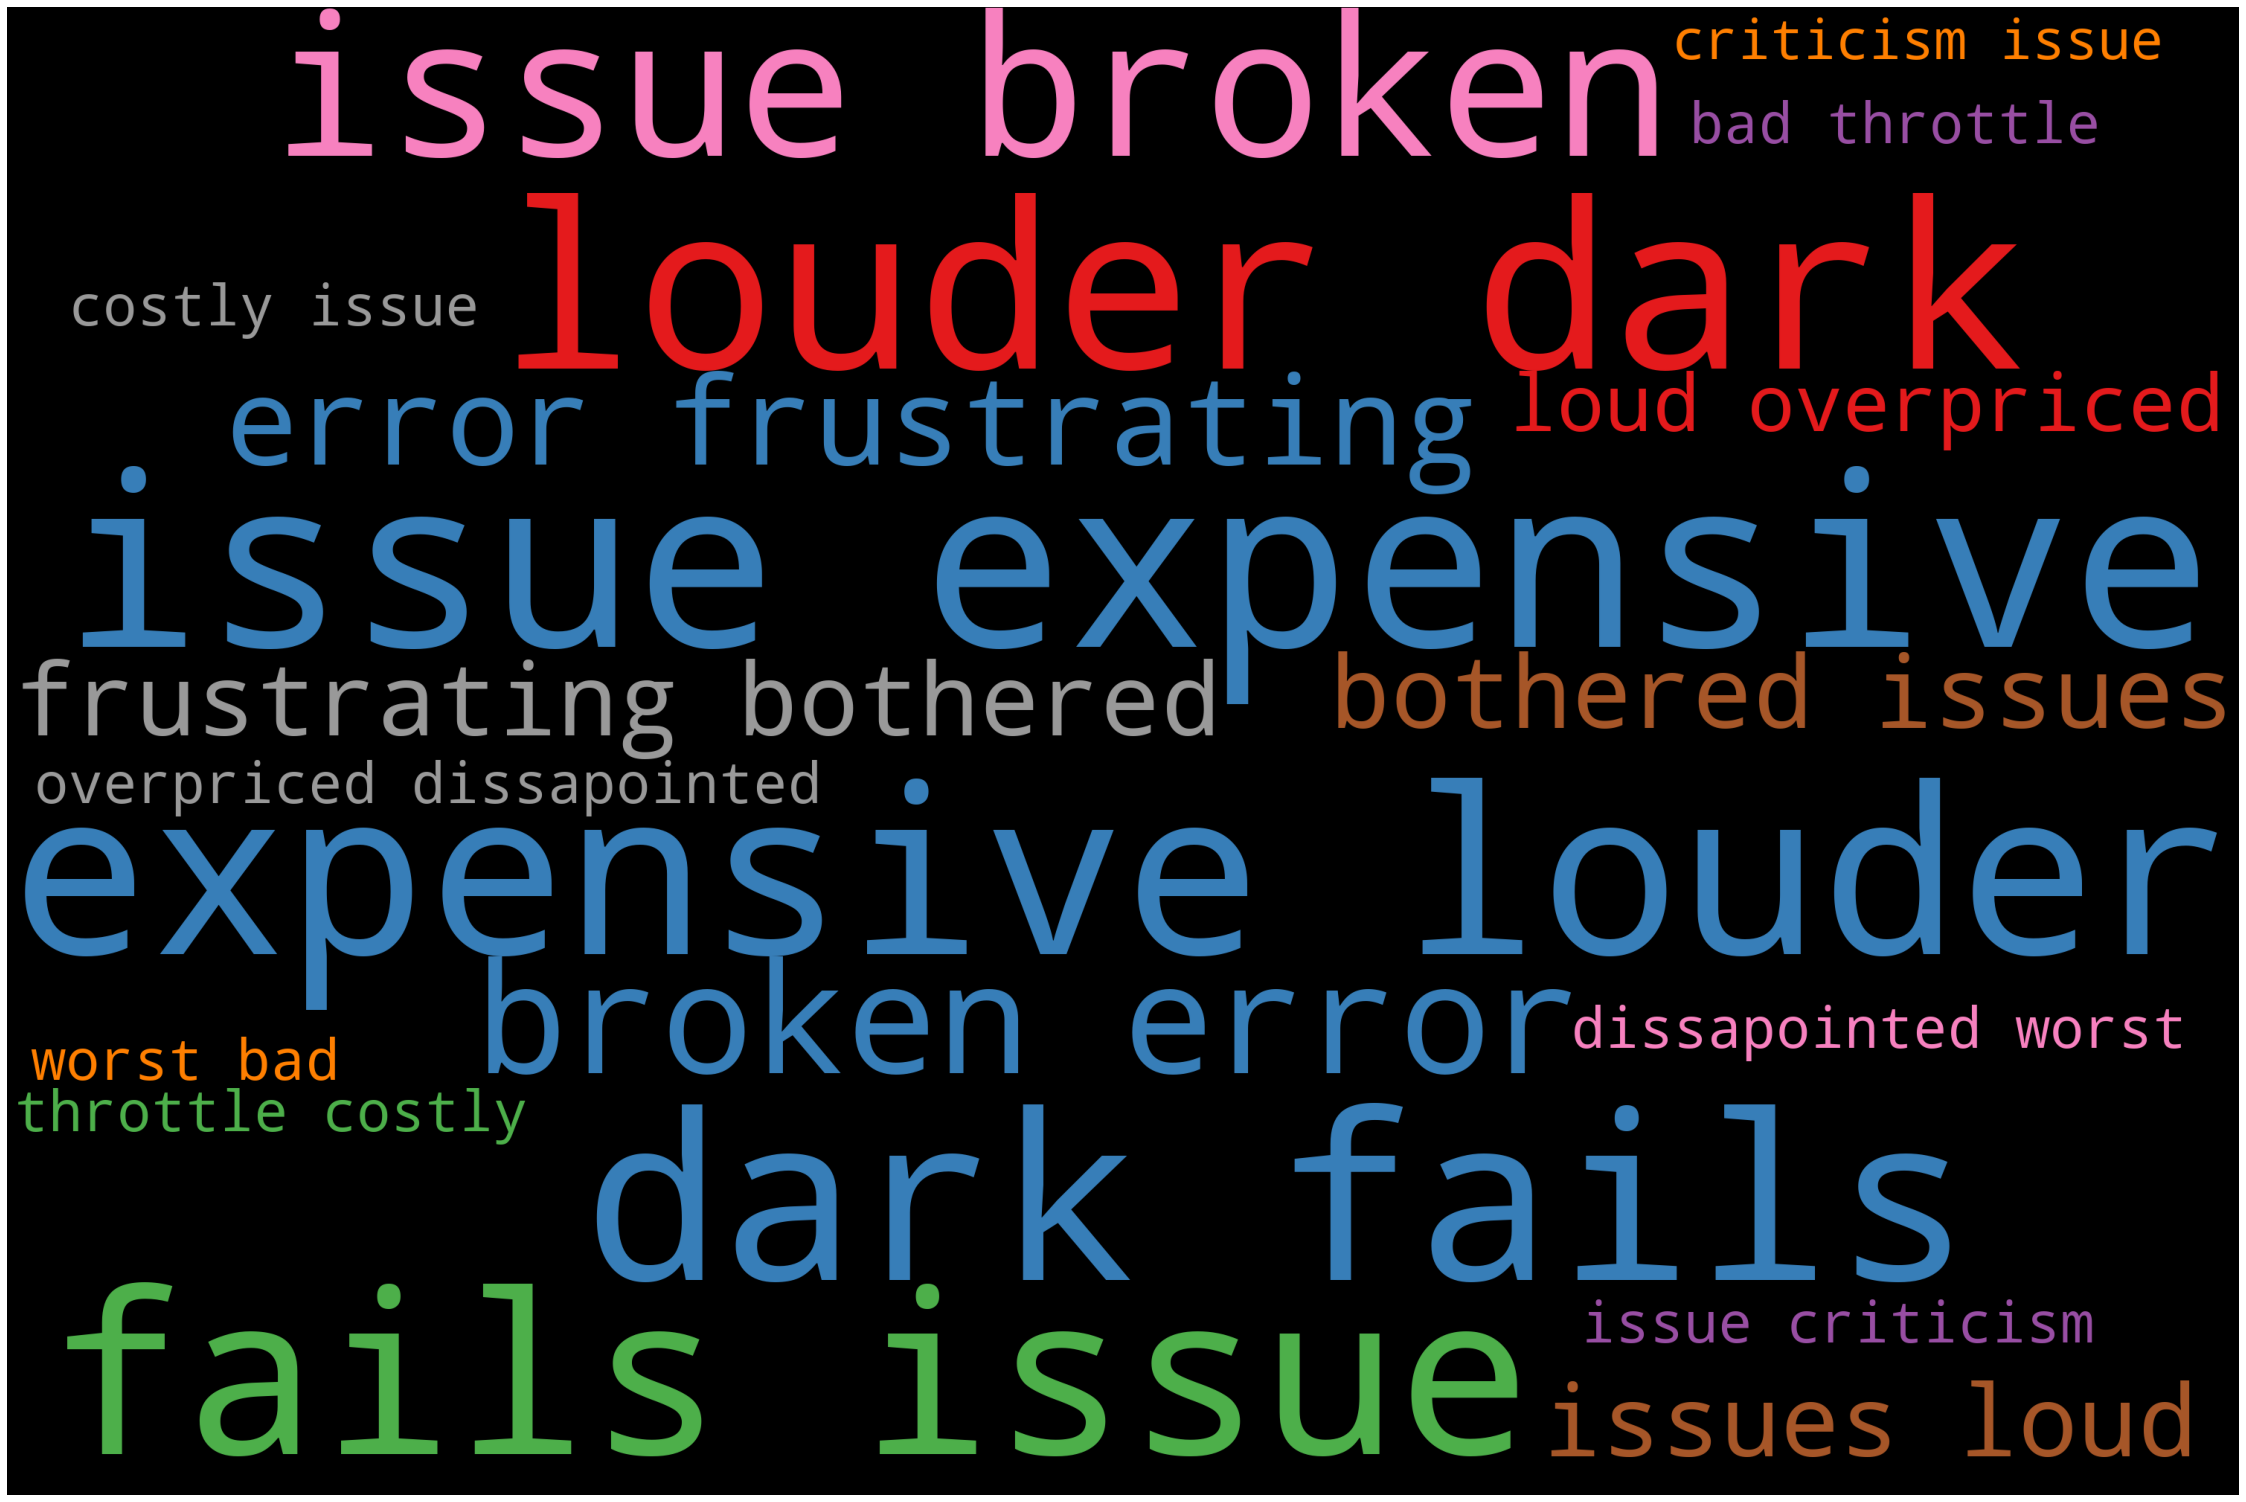

In [46]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [49]:
with open("positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [51]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [52]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

## Word Cloud for positive word

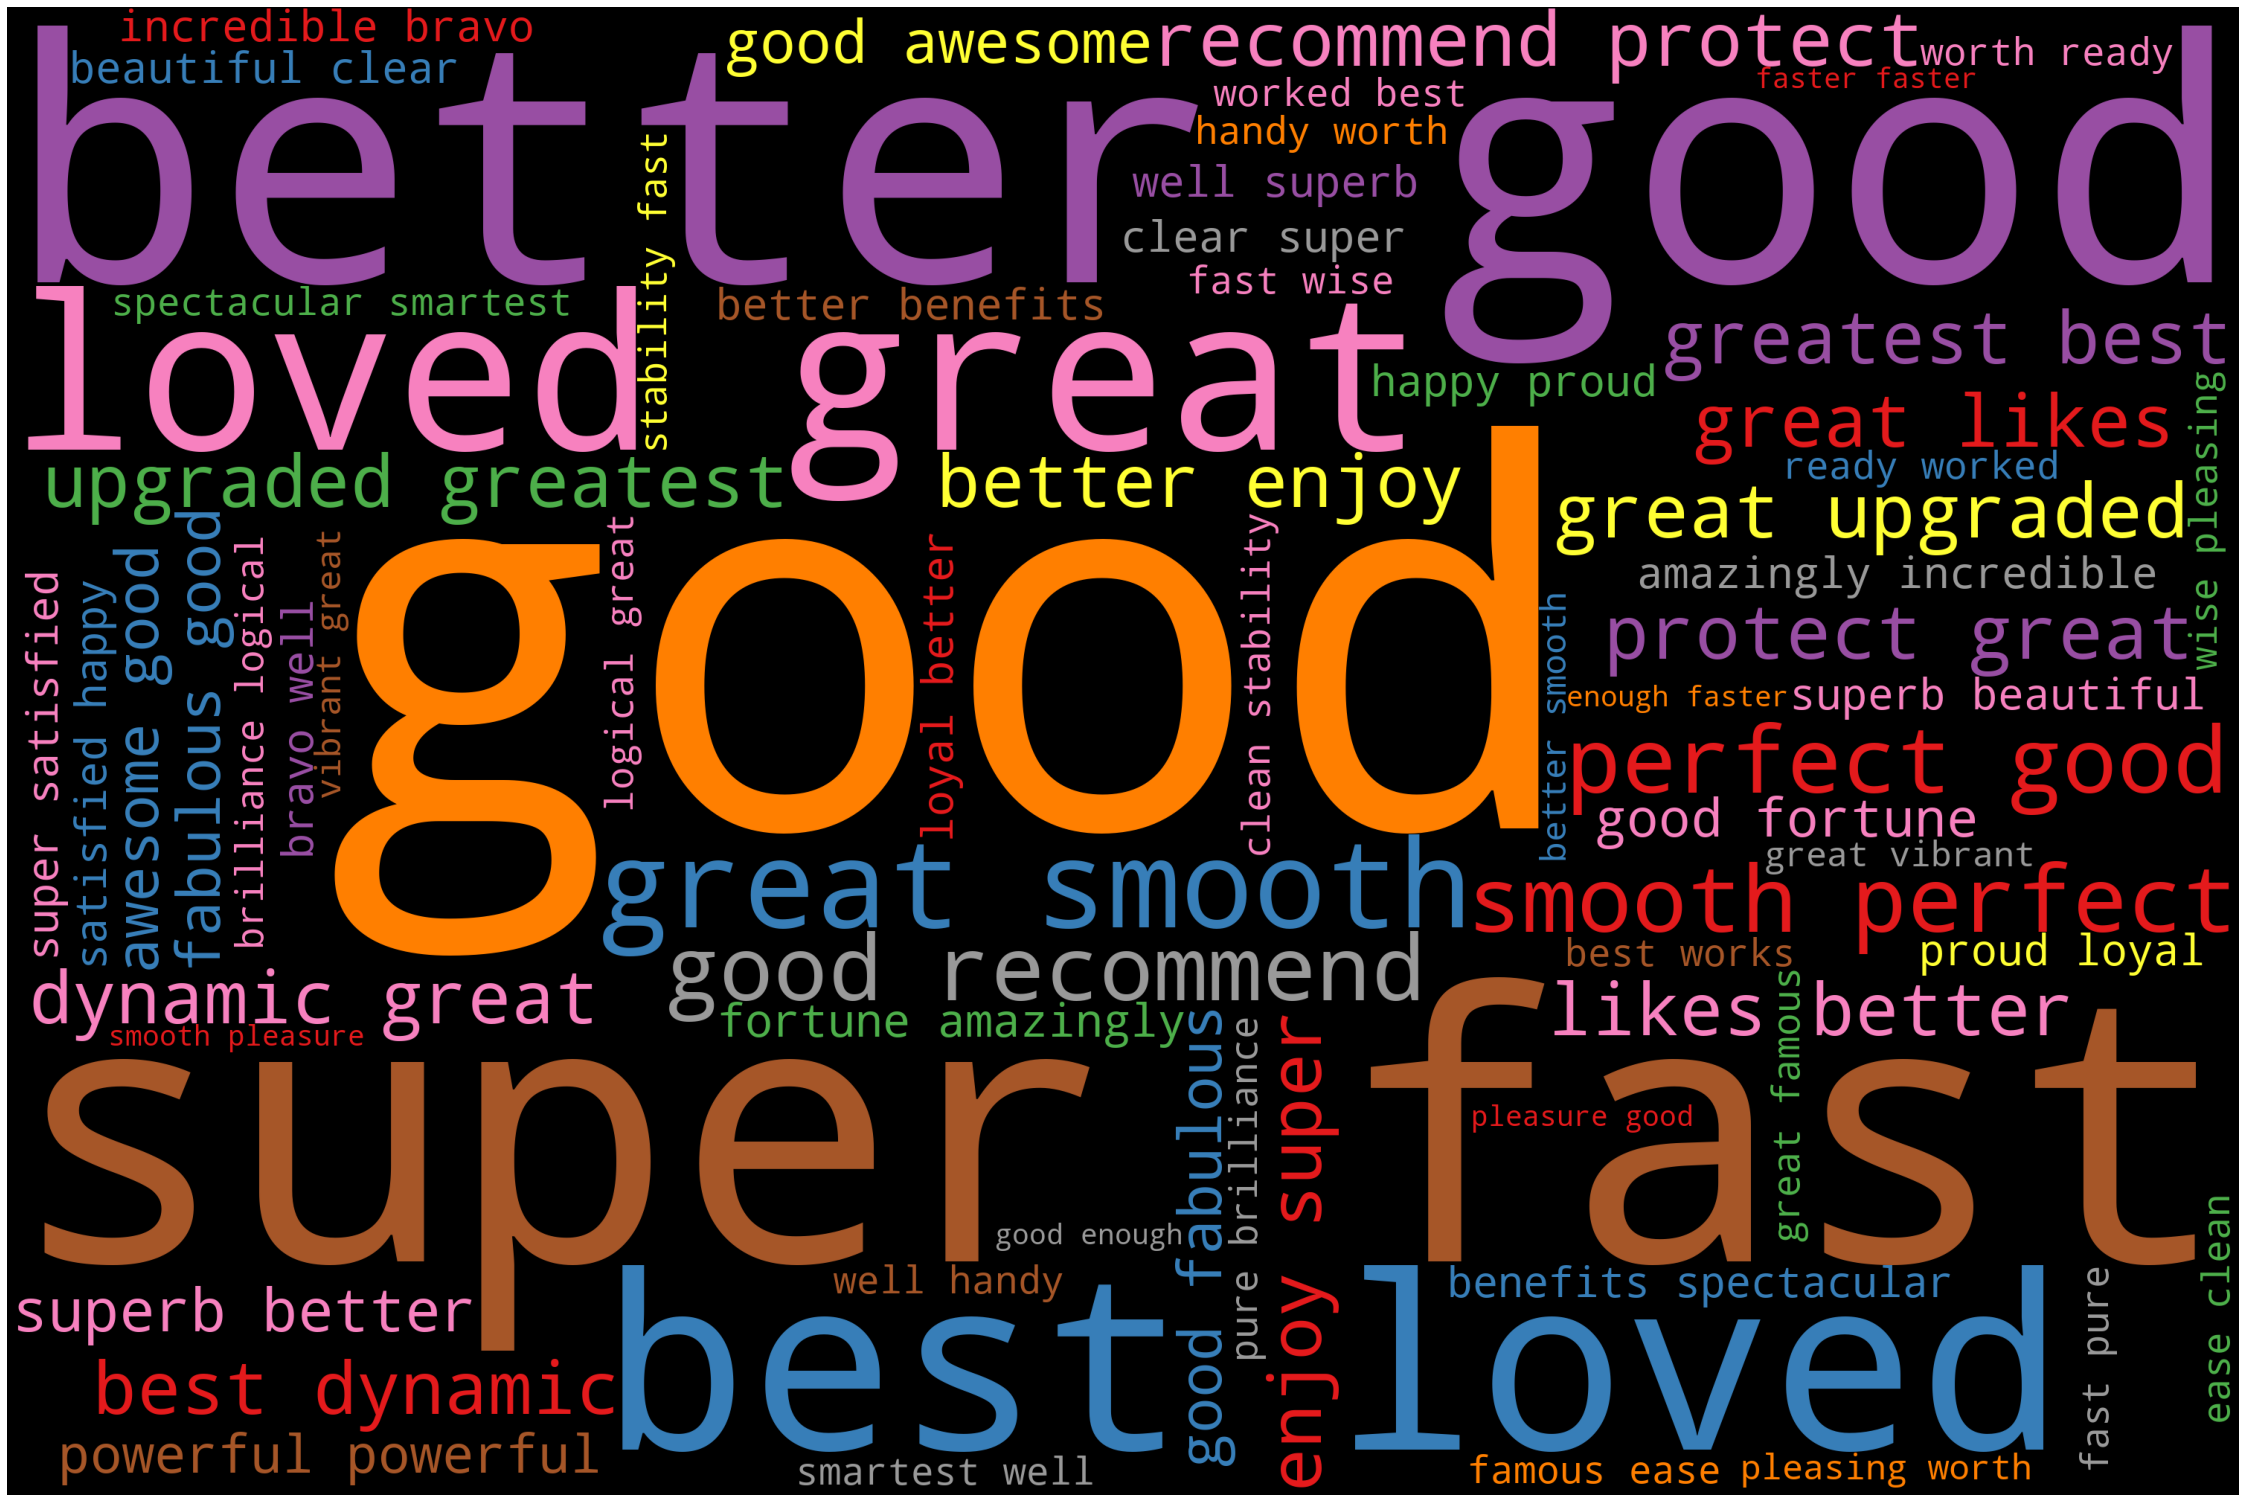

In [53]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)